In [2]:
# Import TensorFlow. TensorFlow provides the deep learning framework and Keras API for building models.
import tensorflow as tf

# Load the MNIST dataset directly from TensorFlow's built-in datasets.
# The dataset is automatically downloaded from an online source and split into training and test sets.
# x_train and x_test contain image pixel data, while y_train and y_test contain the corresponding digit labels.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values of the images from the original range of 0 to 255 to a range of 0 to 1.
# This scaling helps the neural network train faster and more reliably.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a Sequential model, which is a linear stack of layers.
model = tf.keras.models.Sequential([
    # The Flatten layer converts the 2D 28x28 images into a 1D array of 784 pixels.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    # A Dense (fully-connected) layer with 128 neurons and ReLU activation for introducing non-linearity.
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Dropout layer randomly sets 20% of its inputs to zero during training.
    # This prevents overfitting by ensuring that the model does not rely too heavily on any particular set of features.
    tf.keras.layers.Dropout(0.2),
    
    # The final Dense layer with 10 neurons and softmax activation.
    # Each neuron corresponds to one of the 10 digits (0-9), and softmax outputs a probability distribution.
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model.
# - optimizer='adam': Adam optimizer adjusts the learning rate during training.
# - loss='sparse_categorical_crossentropy': This loss function is used for integer-labeled classification.
# - metrics=['accuracy']: The model will report accuracy during training and testing.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train (fit) the model on the training data over 5 epochs.
# An epoch means one full pass through the entire training dataset.
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test set.
# This provides an unbiased evaluation of how well the model generalizes to new, unseen data.
model.evaluate(x_test, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


c:\Users\USER\python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9141 - loss: 0.2942
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9577 - loss: 0.1416
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9673 - loss: 0.1077
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9725 - loss: 0.0883
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9772 - loss: 0.0742
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0729


[0.07289966195821762, 0.9764999747276306]

c:\Users\USER\python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.8769 - loss: 0.3974 - val_accuracy: 0.9792 - val_loss: 0.0667
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9641 - loss: 0.1268 - val_accuracy: 0.9870 - val_loss: 0.0414
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9758 - loss: 0.0852 - val_accuracy: 0.9879 - val_loss: 0.0354
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9801 - loss: 0.0708 - val_accuracy: 0.9892 - val_loss: 0.0361
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9830 - loss: 0.0600 - val_accuracy: 0.9911 - val_loss: 0.0268
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9859 - loss: 0.0496 - val_accuracy: 0.9903 - val_loss: 0.0298
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9872 - loss: 0.0442 - val_accuracy: 0.9903 - val_loss: 0.0328
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9887 - loss: 0.0381 - 

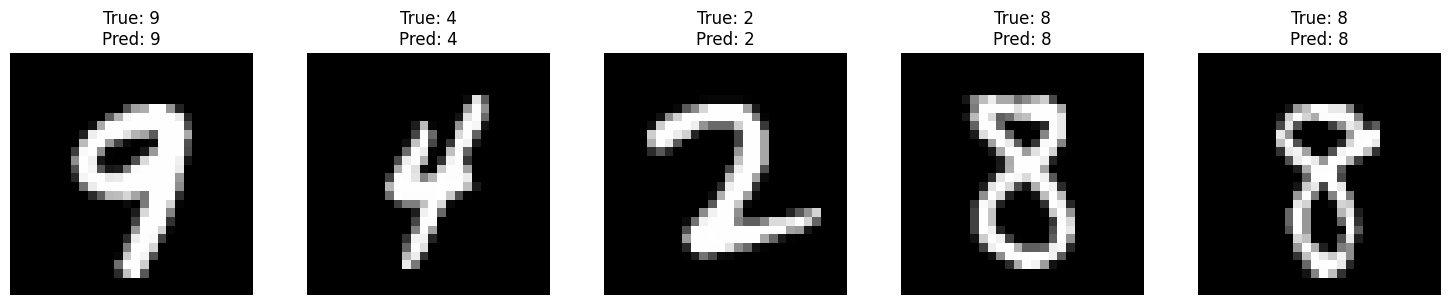

Final test accuracy: 0.9915


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions on test set
predictions = model.predict(x_test)

# Visualize model predictions on 5 sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    # Get a random test image
    idx = np.random.randint(0, len(x_test))
    image = x_test[idx]
    true_label = np.argmax(y_test[idx])
    predicted_label = np.argmax(predictions[idx])

    # Plot the image
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f'True: {true_label}\nPred: {predicted_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print final test accuracy
print(f"Final test accuracy: {test_accuracy:.4f}")